In [1]:
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

D:\Anaconda\envs\pytorch\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
seq_len = 6

gold_df = pd.read_csv('input\Gold Price.csv')
gold_scaler = MinMaxScaler(feature_range=(-1, 1))
x = gold_scaler.fit_transform(gold_df['USD (PM)'].values.reshape(-1, 1))
result_pred = []
for i in tqdm(range(seq_len, len(gold_df))):
    model = ARIMA(x[:i], order=(4,1,4))
    try:
        result = model.fit()
        result_pred.append(result.forecast(step=1)[0])
    except:
        result_pred.append(np.nan)

pred_price = np.array([np.nan] * seq_len + result_pred)
is_nan = np.isnan(pred_price)
mean_squared_error(gold_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)), gold_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)), squared=True)

100%|██████████| 1259/1259 [09:16<00:00,  2.26it/s]


195.15271122506527

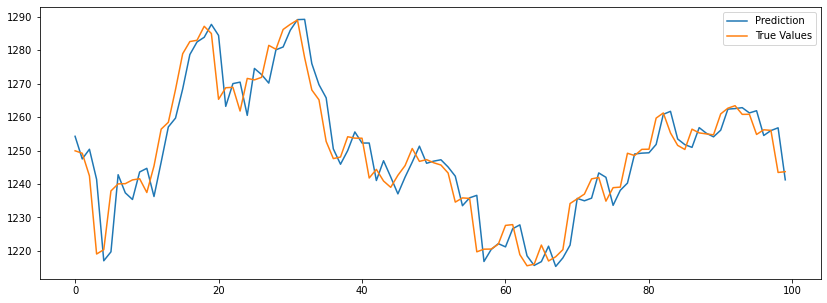

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(gold_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)).flatten()[500:600], label = 'Prediction')
plt.plot(gold_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)).flatten()[500:600], label = 'True Values')
plt.legend()
plt.show()

In [4]:
# gold_df['pred'] = gold_scaler.inverse_transform(pred_price.reshape(-1, 1)).flatten()
# gold_df.to_csv('ARIMA_pred_gold.csv')

In [5]:
seq_len = 6

bit_df = pd.read_csv('input\Bitcoin Price.csv')
bit_scaler = MinMaxScaler(feature_range=(-1, 1))
x = bit_scaler.fit_transform(bit_df['Value'].values.reshape(-1, 1))
result_pred = []
for i in tqdm(range(seq_len, len(bit_df))):
    model = ARIMA(x[:i], order=(4,1,4))
    try:
        result = model.fit()
        result_pred.append(result.forecast(step=1)[0])
    except:
        result_pred.append(np.nan)

pred_price = np.array([np.nan] * seq_len + result_pred)
is_nan = np.isnan(pred_price)
mean_squared_error(bit_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)), bit_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)), squared=True)

100%|██████████| 1820/1820 [16:19<00:00,  1.86it/s]


687069.9513036781

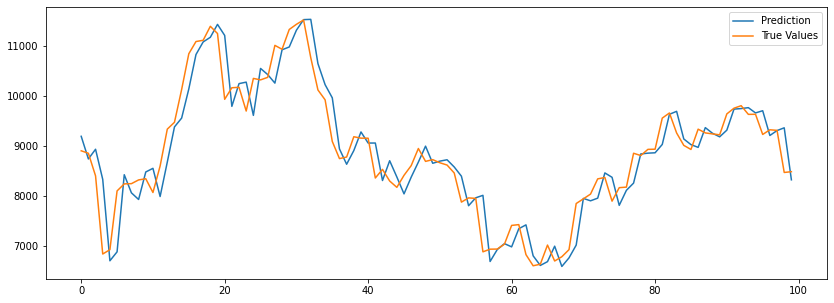

In [6]:
plt.figure(figsize=(14, 5))
plt.plot(bit_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)[500:600]).flatten(), label = 'Prediction')
plt.plot(bit_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)[500:600]).flatten(), label = 'True Values')
plt.legend()
plt.show()

In [7]:
# gold_df['pred'] = gold_scaler.inverse_transform(pred_price.reshape(-1, 1)).flatten()
# gold_df.to_csv('ARIMA_pred_gold.csv')